In [6]:
import texthero as hero
import pandas as pd
#Read csv file
df = pd.read_csv("Penn_State_Posts_test_data.csv")

In [7]:
df.head()

,date_created,post_type,postid,superparentid,community,title,body_anonymised,post_tags,userid_hashed,age,...,treatments_in_profile,followers,following,follower_ids_hashed,Unnamed: 19,Cancer_Staging_Posts,Cancer_Staging_Bios,Category: body_anonymised,Category: profile_bio_anonymised,Unnamed: 24
0,8/11/11,Main post,39755,39755,The Roy Castle Lung Cancer Foundation,Pops,Just saw this blog and though it would be a go...,Radiotherapy | Lung cancer | Erlotinib | Chemo...,95e62984b87e90645a5cf77037395959,None,...,None,0,0,None,NaN,NaN,NaN,unknown,NaN,NaN
1,8/12/11,Comment,39955,39755,The Roy Castle Lung Cancer Foundation,RE: Pops,Thanks for your kind words X . I spoke to my D...,NaN,95e62984b87e90645a5cf77037395959,None,...,None,0,0,None,NaN,NaN,NaN,unknown,NaN,NaN
2,11/7/11,Main post,69080,69080,The Roy Castle Lung Cancer Foundation,1 year anniversary,Well its been a year this week since I had my ...,Lung cancer | Surgery,c6c61abda705fbc0728c076d60ed74b8,None,...,None,0,0,None,NaN,NaN,NaN,unknown,NaN,NaN
3,11/15/11,Comment,73774,69080,The Roy Castle Lung Cancer Foundation,RE: 1 year anniversary,Congrats on your first anniversary of many ! I...,NaN,b9937273f2b46912b56d09c8faa7da23,None,...,None,0,0,None,NaN,NaN,NaN,unknown,unknown,NaN
4,11/15/11,Main post,73776,73776,The Roy Castle Lung Cancer Foundation,Has anyone had WBR (whole brain radiation) for...,Thank you X ... i will keep in touch with all ...,None,b9937273f2b46912b56d09c8faa7da23,None,...,None,0,0,None,NaN,NaN,NaN,unknown,unknown,NaN


In [8]:
#convert input columns to of type string
data['body_anonymised'] = data['body_anonymised'].astype(str)
profile_data['profile_bio_anonymised'] = profile_data['profile_bio_anonymised'].astype(str)

NameError: name 'data' is not defined

In [9]:
#display columns
df.columns

Index(['date_created', 'post_type', 'postid', 'superparentid', 'community',
       'title', 'body_anonymised', 'post_tags', 'userid_hashed', 'age',
       'country', 'gender', 'ethnicity', 'profile_bio_anonymised',
       'conditions_in_profile', 'treatments_in_profile', 'followers',
       'following', 'follower_ids_hashed', 'Unnamed: 19',
       'Cancer_Staging_Posts', 'Cancer_Staging_Bios',
       'Category: body_anonymised', 'Category: profile_bio_anonymised',
       'Unnamed: 24'],
      dtype='object')

In [10]:
#Narrow the data to focus on body text and labels, include profile
df = df[0:17200]
col = ['body_anonymised', 'Category: body_anonymised']
data = df[col]

In [11]:
col_profile = ['profile_bio_anonymised', 'Category: profile_bio_anonymised']
profile_data = df[col_profile]

In [12]:
data.dropna(inplace=True)
profile_data.dropna(inplace=True)

<ipython-input-12-795e4316d6aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-12-795e4316d6aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data.dropna(inplace=True)


In [13]:
#display data
data.head()

,body_anonymised,Category: body_anonymised
0,Just saw this blog and though it would be a go...,unknown
1,Thanks for your kind words X . I spoke to my D...,unknown
2,Well its been a year this week since I had my ...,unknown
3,Congrats on your first anniversary of many ! I...,unknown
4,Thank you X ... i will keep in touch with all ...,unknown


In [14]:
#import visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unknown                      13250
Stage 3B/4                    2687
Stage 1B/2/3A(Resectable)      523
Stage 1A                       477
Stage 3A/3B(Unresectable)      224
Name: Category: body_anonymised, dtype: int64

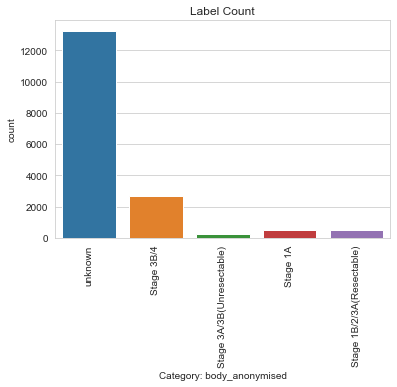

In [15]:
#visualize data in graph
sns.countplot(data['Category: body_anonymised'])
plt.title('Label Count')
plt.xticks(rotation = 90)
#Label Count
data['Category: body_anonymised'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unknown                      3112
Stage 3B/4                   1235
Stage 1B/2/3A(Resectable)     454
Stage 1A                      281
Stage 3A/3B(Unresectable)     177
Name: Category: profile_bio_anonymised, dtype: int64

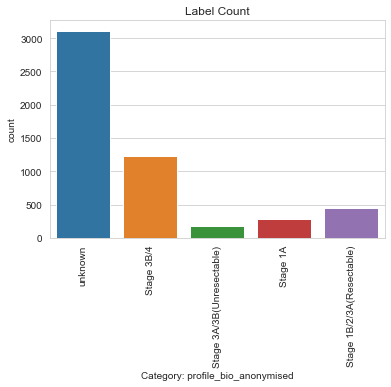

In [16]:
sns.countplot(profile_data['Category: profile_bio_anonymised'])
plt.title('Label Count')
plt.xticks(rotation = 90)
profile_data['Category: profile_bio_anonymised'].value_counts()

In [17]:
#Preprocess data with texthero
data['clean_text'] = hero.clean(data['body_anonymised'])
profile_data['clean_text'] = hero.clean(profile_data['profile_bio_anonymised'])

<ipython-input-17-6aa4dcc584d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = hero.clean(data['body_anonymised'])
<ipython-input-17-6aa4dcc584d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data['clean_text'] = hero.clean(profile_data['profile_bio_anonymised'])


In [18]:
#display cleaned text
data.head()

,body_anonymised,Category: body_anonymised,clean_text
0,Just saw this blog and though it would be a go...,unknown,saw blog though would good place say head hear...
1,Thanks for your kind words X . I spoke to my D...,unknown,thanks kind words x spoke dad nurse first diag...
2,Well its been a year this week since I had my ...,unknown,well year week since surgery time last year co...
3,Congrats on your first anniversary of many ! I...,unknown,congrats first anniversary many know exactly e...
4,Thank you X ... i will keep in touch with all ...,unknown,thank x keep touch prayers going


In [19]:
#Clean text length
data['clean_text_length'] = data['clean_text'].apply(lambda x: len(x))
profile_data['clean_text_length'] = profile_data['clean_text'].apply(lambda x: len(x))

<ipython-input-19-0ec05b1d3af4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text_length'] = data['clean_text'].apply(lambda x: len(x))
<ipython-input-19-0ec05b1d3af4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data['clean_text_length'] = profile_data['clean_text'].apply(lambda x: len(x))


In [20]:
#display clean text length
data.head()

,body_anonymised,Category: body_anonymised,clean_text,clean_text_length
0,Just saw this blog and though it would be a go...,unknown,saw blog though would good place say head hear...,563
1,Thanks for your kind words X . I spoke to my D...,unknown,thanks kind words x spoke dad nurse first diag...,197
2,Well its been a year this week since I had my ...,unknown,well year week since surgery time last year co...,420
3,Congrats on your first anniversary of many ! I...,unknown,congrats first anniversary many know exactly e...,235
4,Thank you X ... i will keep in touch with all ...,unknown,thank x keep touch prayers going,32


<AxesSubplot:xlabel='body_anonymised', ylabel='Count'>

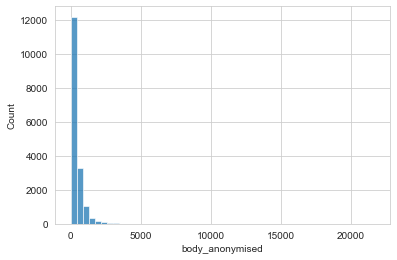

In [21]:
sns.histplot(data['body_anonymised'].apply(lambda x: len(x)), bins = 50)

In [22]:
#create list of words
words_to_remove = ['x', 'n', 'hope', 'would', 'like', 'hi', "n'","'"]

#thank and thanks, treatment and treatments, 
def remove_words(text):
    text = text.replace('thanks','thank')
    text = text.replace('treatments','treatment')
    text = " ".join([word for word in text.split() if word not in words_to_remove])
    return text

In [23]:
#Apply Remove words to the clean text column
data['clean_text'] = data['clean_text'].apply(lambda x: remove_words(x))
profile_data['clean_text'] = profile_data['clean_text'].apply(lambda x: remove_words(x))

<ipython-input-23-ecd8747a15dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(lambda x: remove_words(x))
<ipython-input-23-ecd8747a15dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data['clean_text'] = profile_data['clean_text'].apply(lambda x: remove_words(x))


In [24]:
# Lemmatizer with nltk package
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text= [wn.lemmatize(word) for word in text.split()]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ramydiga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
#apply lemmatizer to clean text column
data['clean_lem'] = data['clean_text'].apply(lambda x: lemmatizer(x))
profile_data['clean_lem'] = profile_data['clean_text'].apply(lambda x: lemmatizer(x))

<ipython-input-25-c62a1732a80c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_lem'] = data['clean_text'].apply(lambda x: lemmatizer(x))
<ipython-input-25-c62a1732a80c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data['clean_lem'] = profile_data['clean_text'].apply(lambda x: lemmatizer(x))


In [26]:
#visualize clean text and lemmatization
data.head()

,body_anonymised,Category: body_anonymised,clean_text,clean_text_length,clean_lem
0,Just saw this blog and though it would be a go...,unknown,saw blog though good place say head heart plac...,563,saw blog though good place say head heart plac...
1,Thanks for your kind words X . I spoke to my D...,unknown,thank kind words spoke dad nurse first diagnos...,197,thank kind word spoke dad nurse first diagnose...
2,Well its been a year this week since I had my ...,unknown,well year week since surgery time last year co...,420,well year week since surgery time last year co...
3,Congrats on your first anniversary of many ! I...,unknown,congrats first anniversary many know exactly e...,235,congrats first anniversary many know exactly e...
4,Thank you X ... i will keep in touch with all ...,unknown,thank keep touch prayers going,32,thank keep touch prayer going


In [27]:
#Import TFIDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Import split train and test data
from sklearn.model_selection import train_test_split

In [28]:
#Import Random Forest Classifier and SVM, Import classification report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm

In [29]:
#drop all NaN values
#data = data.dropna(axis = 0)

In [30]:
#Count number of NaN values if there are
#data['Category: body_anonymised'].isna().sum()

In [31]:
#length of data
len(data)

17161

In [32]:
len(profile_data)

5259

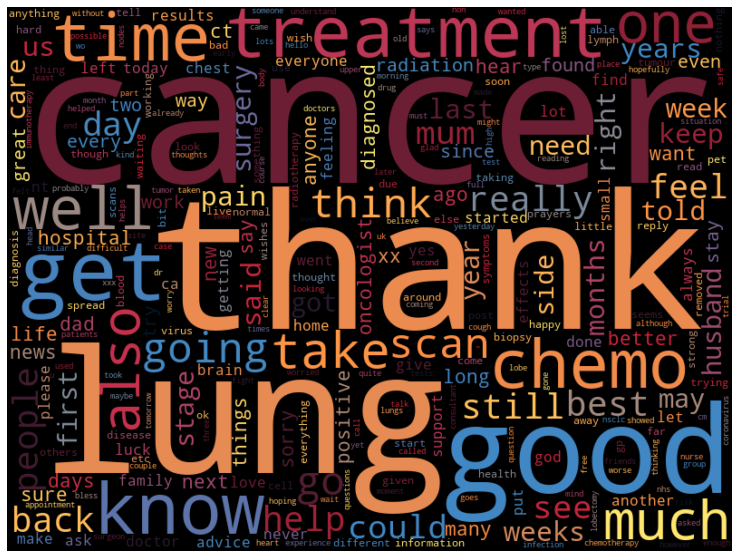

In [33]:
hero.wordcloud(data['clean_text'], max_words =300,width = 800, height =600, background_color = 'Black')

In [42]:
#Splitting data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'],
                                                    data['Category: body_anonymised'],
                                                    random_state = 42, test_size = 0.3)
#X_train, X_test, y_train, y_test = train_test_split(profile_data['clean_text'],
                                                    #profile_data['Category: profile_bio_anonymised'],
                                                    #random_state = 42, test_size = 0.3)

#length of train data
len(X_train)

12012

In [43]:
#Implement TFIDF vectorizer,learning vocabulary of train data and vectorizing training set,fit the parameters on training set and transform data
tfidf = TfidfVectorizer(max_df = 0.7, min_df = 5, ngram_range=(1,1))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf =  tfidf.transform(X_test)

In [44]:
#number of training examples and number of unique words
X_train_tfidf.shape

(12012, 5551)

In [74]:
#Apply SVM on training data
clf = svm.SVC(X_train_tfidf, y_train)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_tfidf, y_train)
# Apply Random Forest Classifier on training data
#clf = RandomForestClassifier(n_estimators = 40,  max_depth = 100)
#clf.fit(X_train_tfidf, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=  (0, 1446)	0.38979743149169505
  (0, 2774)	0.40622598748359473
  (0, 4636)	0.5881209503595147
  (0, 5496)	0.5806480493755892
  (1, 60)	0.21978127663524896
  (1, 604)	0.21134742543704818
  (1, 694)	0.22551429301226453
  (1, 810)	0.20466158688556307
  (1, 905)	0.17808165121332656
  (1, 1132)	0.1590627093111443
  (1, 1157)	0.21978127663524896
  (1, 1229)	0.1696175877910394
  (1, 1529)	0.19439282095568225
  (1, 1588)	0.18724249331377443
  (1, 1779)	0.12818449121302283
  (1, 2174)	0.1451715145144869
  (1, 2225)	0.11088418942387072
  (1, 2676)	0.21002468635143595
  (1, 2829)	0.17233556663367963
  (1, 2834)	0.16321706902836403
  (1, 3005)	0.22158188473801205
  (1, 3072)	0.1566038472051733
  (1, 3149)	0.1167675753217724
  (1, 3210)	0.14762674302269851
  (1, 3280)	0.15295396442600445
  :	:
  (12009, 3612)	0.13131814085767082
  (12009, 3648)	0.15427945988553513
  (12009, 3820)	0.17586157809967207
  

SVC(decision_function_shape='ovo')

In [75]:
#predicting test data
y_pred_class = clf.predict(X_test_tfidf)

In [76]:
#predictions returned
y_pred_class

array(['Stage 3B/4', 'unknown', 'unknown', ..., 'unknown', 'unknown',
       'unknown'], dtype=object)

In [77]:
#classification report
print(classification_report(y_test, y_pred_class))

                           precision    recall  f1-score   support

                 Stage 1A       0.67      0.28      0.40       165
Stage 1B/2/3A(Resectable)       0.74      0.28      0.40       162
Stage 3A/3B(Unresectable)       0.67      0.03      0.06        65
               Stage 3B/4       0.81      0.65      0.72       778
                  unknown       0.89      0.99      0.94      3979

                 accuracy                           0.88      5149
                macro avg       0.76      0.45      0.50      5149
             weighted avg       0.87      0.88      0.86      5149



In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_class))

[[  47    8    0    8  102]
 [  13   45    1   32   71]
 [   0    0    2   24   39]
 [   5    7    0  504  262]
 [   5    1    0   53 3920]]
